In [1]:
import sympy as sp

def ackley(x, y):
    """
    2D Ackley function.
    """
    t1 = -20 * np.exp(-0.2 * np.sqrt(0.5 * (x**2 + y**2)))
    t2 = np.exp(0.5 * (np.cos(2*np.pi*x) + np.cos(2*np.pi*y)))
    t3 = 20 + np.e

    return t1 - t2 + t3

def sym_ackley(x, y):
    """
    2D Ackley function.
    """
    t1 = -20 * sp.exp(-0.2 * sp.sqrt(0.5 * (x**2 + y**2)))
    t2 = sp.exp(0.5 * (sp.cos(2*sp.pi*x) + sp.cos(2*sp.pi*y)))
    t3 = 20 + sp.exp(1)

    return t1 - t2 + t3

def evaluate_ackley(xx, yy):
    x = sp.Symbol('x')
    y = sp.Symbol('y')

    sa = sym_ackley(x, y)
    dack_dx = sp.diff(sa, x)
    dack_dy = sp.diff(sa, y)


    f_of_x_y = ackley(xx,yy)
    gradient = [k.subs(x, xx).subs(y, yy).evalf() for k in [dack_dx, dack_dy]]
    return f_of_x_y, gradient


In [2]:
import os, json

path = "_korali_result"

xs = []
ys = []
a_s = []
files = sorted([x for x in os.listdir(path) if "0" in x], key=lambda x: int(x.replace("gen", "").replace(".json", "")))
for x in files:
    with open(path+"/"+x, 'r') as f:
        if x == "gen00000000.json":
            data = json.load(f)
            dx,dy = data['Variables'] 
            x,y = [k['Initial Value'] for k in [dx, dy]]
            xs.append(x)
            ys.append(y)
        else:
            data = json.load(f)
            a = data['Solver']['Best Ever Value']
            x, y = data['Solver']['Best Ever Variables']
            a_s.append(a)
            xs.append(x)
            ys.append(y)

-0.0010792673670111663 -0.0010792673670111663
-0.004379102946934665


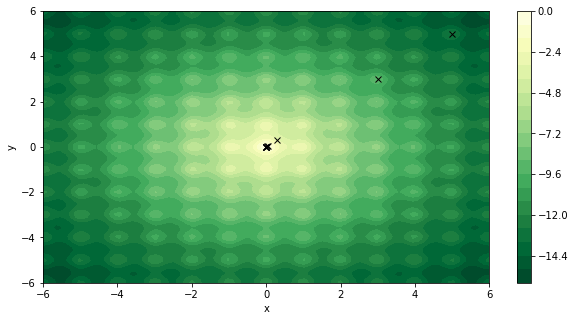

In [10]:
import matplotlib.pyplot as plt
import numpy as np

def negative_ackley(x, y):
    """
    2D Ackley function.
    """
    t1 = -20 * np.exp(-0.2 * np.sqrt(0.5 * (x**2 + y**2)))
    t2 = np.exp(0.5 * (np.cos(2*np.pi*x) + np.cos(2*np.pi*y)))
    t3 = 20 + np.e

    return -1 * (t1 - t2 + t3)

xlist = np.linspace(-6, 6, 100)
ylist = np.linspace(-6, 6, 100)
X,Y = np.meshgrid(xlist, ylist)
Z = negative_ackley(X, Y)

plt.contourf(X,Y,Z,20, cmap="YlGn_r")
plt.colorbar()

plt.plot(xs, ys, 'xk')
print(xs[-1], ys[-1])
print(a_s[-1])

plt.xlabel("x")
plt.ylabel("y")

plt.gcf().set_size_inches(10, 5)
plt.savefig("q1_p2.jpg")

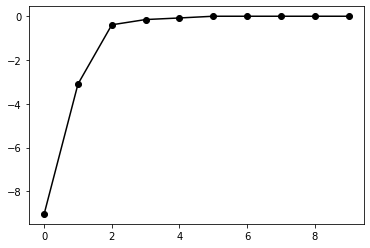

In [4]:
plt.plot(range(len(a_s)), a_s, 'ok-')

In [5]:
xs

[5.0,
 2.999841204524153,
 0.29368907457878246,
 0.057094955829214394,
 0.028297461370832666,
 -0.016977548219256247,
 -0.0010792673670111663,
 -0.0010792673670111663,
 -0.0010792673670111663,
 -0.0010792673670111663,
 -0.0010792673670111663]